In [38]:
import pandas as pd
import sklearn
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
Train_Data = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [Train_Data, test_df]

In [28]:
Train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
Train_Data.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [30]:
Train_Data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [31]:
Train_Data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [34]:
Train_Data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [35]:
Train_Data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [36]:
Train_Data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


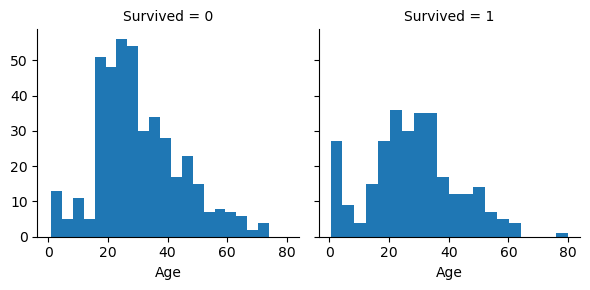

In [40]:
g = sns.FacetGrid(Train_Data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [12]:
Numeric_list = Train_Data.select_dtypes(include=['int', 'float']).columns.tolist()



Numeric_list.remove('Survived')
Numeric_list.remove('Age')

print(Numeric_list)



['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare']


In [21]:
Train_Data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [22]:
Train_Data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [23]:
Train_Data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [41]:
print("Before", Train_Data.shape, test_df.shape, combine[0].shape, combine[1].shape)

Train_Data = Train_Data.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [Train_Data, test_df]

"After", Train_Data.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [43]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(Train_Data['Title'], Train_Data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [44]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
Train_Data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [45]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

Train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


C:\Users\vasch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\vasch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


AttributeError: 'DataFrame' object has no attribute 'Name'

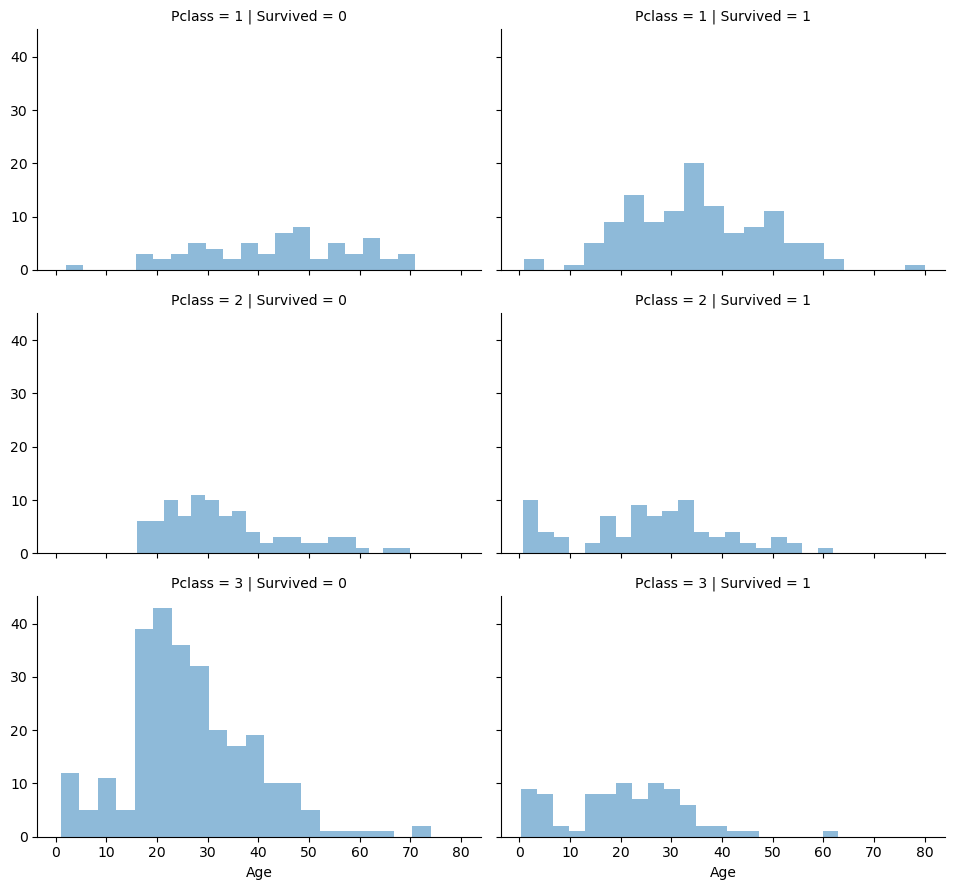

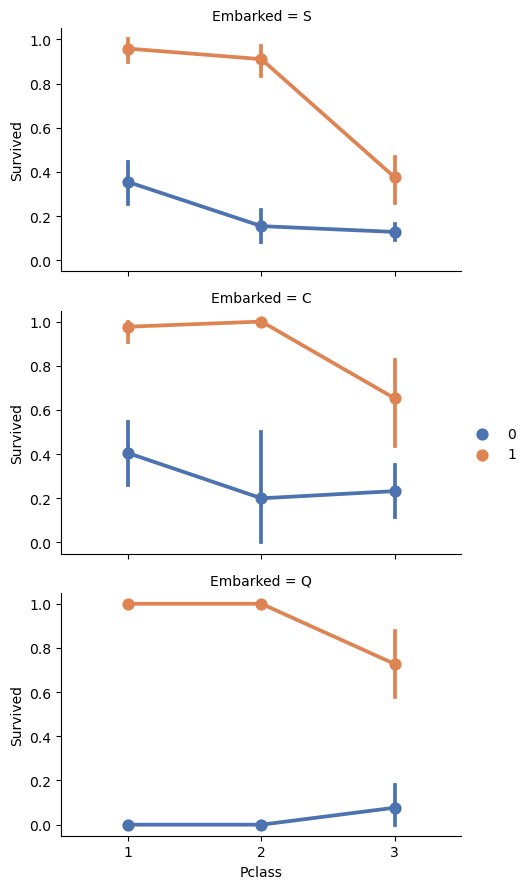

In [52]:
grid = sns.FacetGrid(Train_Data, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
grid = sns.FacetGrid(Train_Data, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(Train_Data['Title'], Train_Data['Sex'])

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
Train_Data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

Train_Data.head()

Train_Data = Train_Data.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [Train_Data, test_df]
Train_Data.shape, test_df.shape


In [54]:
freq_port = Train_Data.Embarked.dropna().mode()[0]
freq_port

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
Train_Data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

Train_Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0.0
1,1,1,1,38.0,1,0,71.2833,1,0.0
2,1,3,1,26.0,0,0,7.9250,0,0.0
3,1,1,1,35.0,1,0,53.1000,0,0.0
4,0,3,0,35.0,0,0,8.0500,0,0.0


In [55]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2,0.0
1,893,3,1,47.0,1,0,7.0000,0,0.0
2,894,2,0,62.0,0,0,9.6875,2,0.0
3,895,3,0,27.0,0,0,8.6625,0,0.0
4,896,3,1,22.0,1,1,12.2875,0,0.0


In [57]:
Train_Data['FareBand'] = pd.qcut(Train_Data['Fare'], 4)
Train_Data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

C:\Users\vasch\AppData\Local\Temp\ipykernel_7464\1541075818.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Train_Data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [59]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

Train_Data = Train_Data.drop(['FareBand'], axis=1)
combine = [Train_Data, test_df]
    
Train_Data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,0,0,0.0
1,1,1,1,38.0,1,0,0,1,0.0
2,1,3,1,26.0,0,0,0,0,0.0
3,1,1,1,35.0,1,0,0,0,0.0
4,0,3,0,35.0,0,0,0,0,0.0
5,0,3,0,NaN,0,0,0,2,0.0
6,0,1,0,54.0,0,0,0,0,0.0
7,0,3,0,2.0,3,1,0,0,0.0
8,1,3,1,27.0,0,2,0,0,0.0
9,1,2,1,14.0,1,0,0,1,0.0


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

X_train = Train_Data.drop("Survived", axis=1)
Y_train = Train_Data["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape



logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [13]:
from scipy import stats

# Assuming 'numeric_variable' is your numeric variable and 'categorical_variable' is your categorical variable

# Calculate point-biserial correlation coefficient

for i in range(len(Numeric_list)):
    correlation, p_value = stats.pointbiserialr(Train_Data[Numeric_list[i]], Train_Data['Survived'])
    
    print("Point-Biserial Correlation Coefficient between Survival and " + Numeric_list[i] + ":", correlation)
    print("P-value:", p_value)
    print()



Point-Biserial Correlation Coefficient between Survival and PassengerId: -0.005006660767066509
P-value: 0.8813657768798073

Point-Biserial Correlation Coefficient between Survival and Pclass: -0.3384810359610153
P-value: 2.537047387981485e-25

Point-Biserial Correlation Coefficient between Survival and SibSp: -0.03532249888573556
P-value: 0.29224392869829624

Point-Biserial Correlation Coefficient between Survival and Parch: 0.08162940708348347
P-value: 0.014799245374727947

Point-Biserial Correlation Coefficient between Survival and Fare: 0.2573065223849624
P-value: 6.120189341924608e-15



In [14]:
import numpy as np
Categorical_list = Train_Data.select_dtypes(include=['object']).columns.tolist()
Categorical_list.remove('Cabin')

print(Categorical_list)



['Name', 'Sex', 'Ticket', 'Embarked']


In [15]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Assuming 'categorical_var1' and 'categorical_var2' are your categorical variables

# Create a contingency table

for j in range(len(Categorical_list)):
    contingency_table = pd.crosstab(Train_Data[Categorical_list[j]], Train_Data['Survived'])
    
    # Perform the Chi-square test
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
    
    # Determine the degree of association using Cramer's V
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2_stat / (n * min_dim))
    
    print("Chi-square test statistic:", chi2_stat)
    print("P-value:", p_val)
    print("Cramer's V between Survival and " + Categorical_list[j] + ":", cramer_v)
    print()


Chi-square test statistic: 891.0
P-value: 0.484248151973633
Cramer's V between Survival and Name: 1.0

Chi-square test statistic: 260.71702016732104
P-value: 1.1973570627755645e-58
Cramer's V between Survival and Sex: 0.5409359434469282

Chi-square test statistic: 766.5697029458893
P-value: 0.01152729601163775
Cramer's V between Survival and Ticket: 0.9275492387400215

Chi-square test statistic: 26.48914983923762
P-value: 1.769922284120912e-06
Cramer's V between Survival and Embarked: 0.17261682709984438



In [16]:
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [18]:
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Extracted_features = ['Pclass', 'Fare'] #'Name', 'Ticket'],
Response = 'Survived'

test = pd.read_csv("test.csv")

X = test[Extracted_features].values
y = Train_Data[Response].values.reshape(-1,1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

# Define hyperparameters
input_size = len(Extracted_features)
hidden_size1 = 64
hidden_size2 = 32
output_size = 1
learning_rate = 0.01
num_epochs = 1000

# Instantiate the model
model = NeuralNet(input_size, hidden_size1, hidden_size2, output_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    outputs = torch.sigmoid(outputs)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    model.eval()
    y_pred = model(X_test_tensor)
    y_pred = torch.sigmoid(y_pred)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Epoch [100/1000], Loss: 0.5670
Epoch [200/1000], Loss: 0.5604
Epoch [300/1000], Loss: 0.5580
Epoch [400/1000], Loss: 0.5527
Epoch [500/1000], Loss: 0.5514
Epoch [600/1000], Loss: 0.5459
Epoch [700/1000], Loss: 0.5445
Epoch [800/1000], Loss: 0.5422
Epoch [900/1000], Loss: 0.5408
Epoch [1000/1000], Loss: 0.5398
Test Loss: 0.6182


## model accuracy

In [19]:
# Compute accuracy
y_pred_binary = (y_pred == 1).float()
correct = (y_pred_binary == y_test_tensor).sum().item()
total = y_test_tensor.size(0)
accuracy = correct / total

print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.5810
